# Task 5 - Learning crowd dynamics

In [21]:
from utils import *

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

import itertools
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load the data for the task and delete the header:

In [9]:
data = np.genfromtxt('./data/MI_timesteps.txt', dtype='int')[1:]
data

array([[    1,    36,     0, ...,     0,     0,     0],
       [    2,    36,     0, ...,     0,     0,     0],
       [    3,    43,     0, ...,     0,     0,     0],
       ...,
       [14999,     0,    10, ...,     2,     1,    40],
       [15000,     0,    10, ...,     3,     1,    41],
       [15001,     0,    11, ...,     1,     0,    42]])

Let's ignore the burn-in period of 1000 time steps at the beginning of the file:

In [10]:
data = data[1000:]
data

array([[ 1001,     0,     2, ...,     5,     1,    43],
       [ 1002,     0,     2, ...,     5,     1,    45],
       [ 1003,     0,     2, ...,     5,     0,    46],
       ...,
       [14999,     0,    10, ...,     2,     1,    40],
       [15000,     0,    10, ...,     3,     1,    41],
       [15001,     0,    11, ...,     1,     0,    42]])

## 1st Part

Create the delay embedding with 350 delays of the first three measurement areas (columns 2, 3, 4 in the file):

In [11]:
delayEmbedding = np.zeros((data.shape[0] - 350, 1053))
for i in range(delayEmbedding.shape[0]):
    delayEmbedding[i] = data[i:i+351, 1:4].flatten()

According to Takens theorem we need $2d + 1$ dimensions, i.e., 3 dimensions in our case. Apply PCA on the dataset:

In [12]:
pca = PCA(n_components = 3)

delayEmbedding3Dimensions = pca.fit_transform(delayEmbedding)

Let's check if this number of components correspond to the 90% of the energy:

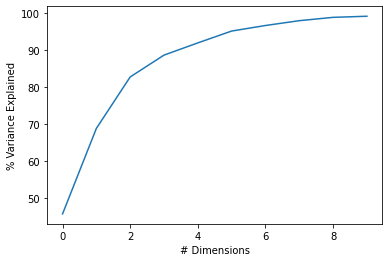

In [13]:
pcaFull = PCA()
pcaFull.fit_transform(delayEmbedding)

var = np.cumsum(np.round(pcaFull.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# Dimensions')
plt.plot(var[:10])

## 2nd Part

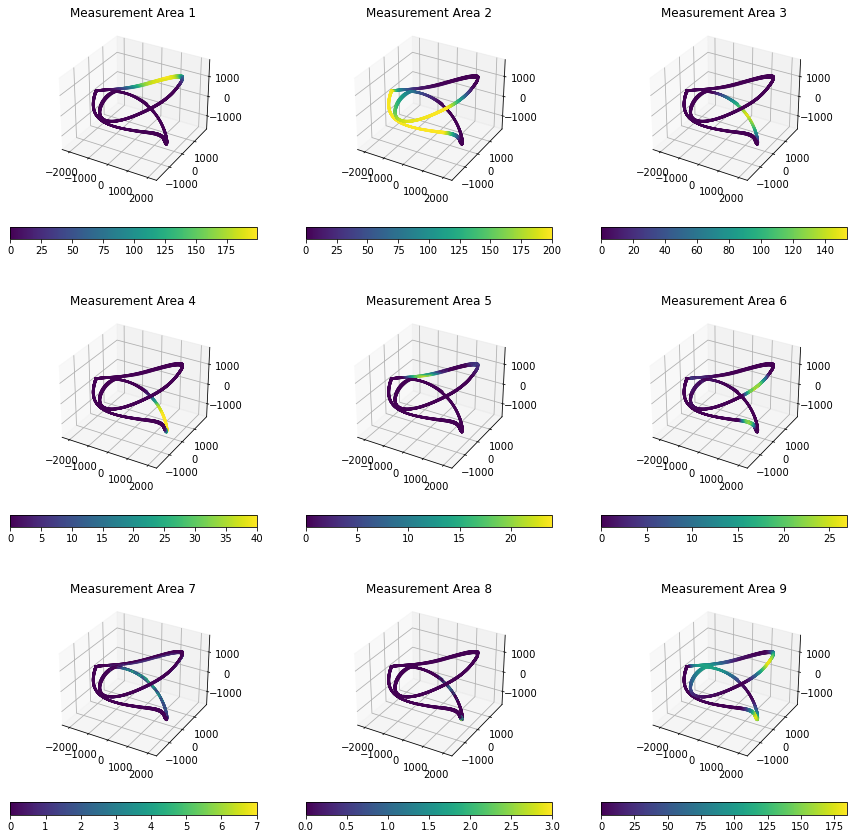

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15), subplot_kw=dict(projection='3d'))

i = 0
for row in range(3):
    for col in range(3):
        s = ax[row, col].scatter(*delayEmbedding3Dimensions.T,
                s = 1,
                c = data[:delayEmbedding3Dimensions.shape[0], i + 1],
                cmap=plt.get_cmap("viridis"))
        ax[row, col].title.set_text("Measurement Area {}".format(i+1))
        fig.colorbar(s, ax=[ax[row, col]], location='bottom')
        i += 1

plt.show()

## 3rd Part

In [24]:
possibleL = list(range(1, 10, 1))
possibleEpsilon = [0.005, 0.05, 0.1, 0.15, 0.2, 0.5, 0.8, 1.0]

minimumMSE = 10000
mimumL = None
minimumEpsilon = None
for L, epsilon in tqdm(list(itertools.product(possibleL, possibleEpsilon))):
    x = approximateNonLinearFunction(np.column_stack((list(range(len(delayEmbedding))), delayEmbedding3Dimensions[:, 0])), L, epsilon)
    y = approximateNonLinearFunction(np.column_stack((list(range(len(delayEmbedding))), delayEmbedding3Dimensions[:, 1])), L, epsilon)
    z = approximateNonLinearFunction(np.column_stack((list(range(len(delayEmbedding))), delayEmbedding3Dimensions[:, 2])), L, epsilon)
    
    mse = np.mean(np.square(np.subtract(x1Data, np.column_stack((x, y)))))
    
    if mse < minimumMSE:
        minimumL = L
        minimumEpsilon = epsilon
        minimumMSE = mse

print("The selected parameters are L = {} and Epsilon = {} with MSE = {}".format(minimumL, minimumEpsilon, minimumMSE))

  0%|          | 0/72 [00:08<?, ?it/s]


NameError: name 'x1Data' is not defined

## 4th Part